<a href="https://colab.research.google.com/github/mjchaudhary00/mjchaudhary00/blob/main/Chest_Xray_YOTO_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pritpal2873_chest_x_ray_dataset_4_categories_path = kagglehub.dataset_download('pritpal2873/chest-x-ray-dataset-4-categories')

print('Data source import complete.')


Using Colab cache for faster access to the 'chest-x-ray-dataset-4-categories' dataset.
Data source import complete.


In [6]:
import pandas as pd
import numpy as np
import os

In [7]:
base_path = "/kaggle/input/chest-x-ray-dataset-4-categories/Chest X_Ray Dataset/"
categories = ["COVID19", "NORMAL", "PNEUMONIA", "TURBERCULOSIS"]

In [8]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [9]:
df.head()

,image_path,label
0,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
1,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
2,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
3,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
4,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19


In [10]:
df.tail()

,image_path,label
7127,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
7128,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
7129,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
7130,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
7131,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS


In [11]:
df.shape

(7132, 2)

In [12]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.isnull().sum()

,0
image_path,0
label,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7132 entries, 0 to 7131
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7132 non-null   object
 1   label       7132 non-null   object
dtypes: object(2)
memory usage: 111.6+ KB


In [16]:
df['label'].unique()

array(['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS'], dtype=object)

In [17]:
df['label'].value_counts()

,count
label,
PNEUMONIA,4273
NORMAL,1583
TURBERCULOSIS,700
COVID19,576


/tmp/ipython-input-490440602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


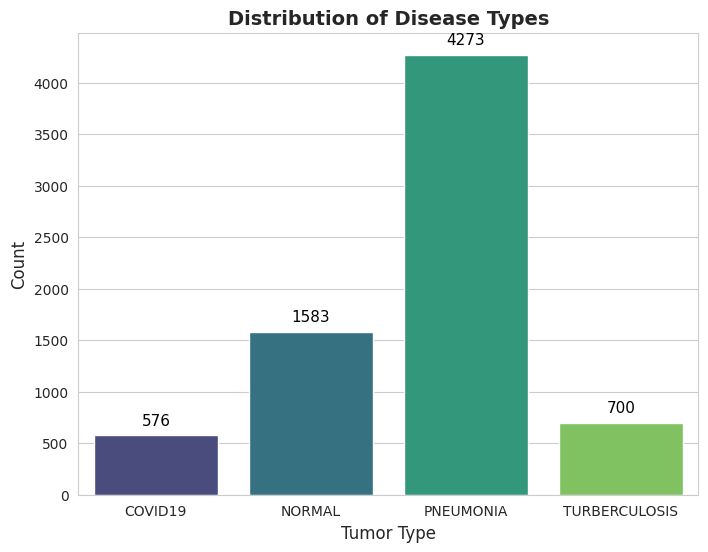

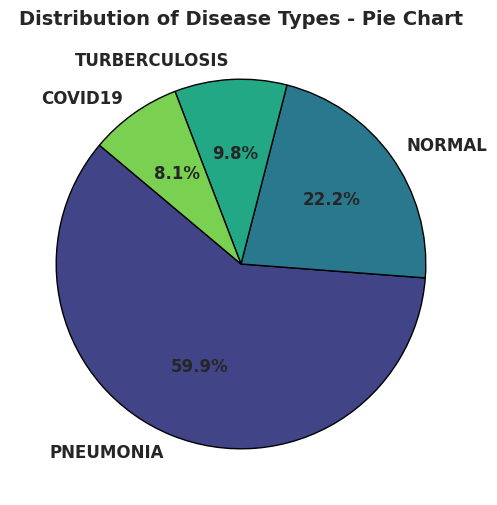

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Disease Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Disease Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

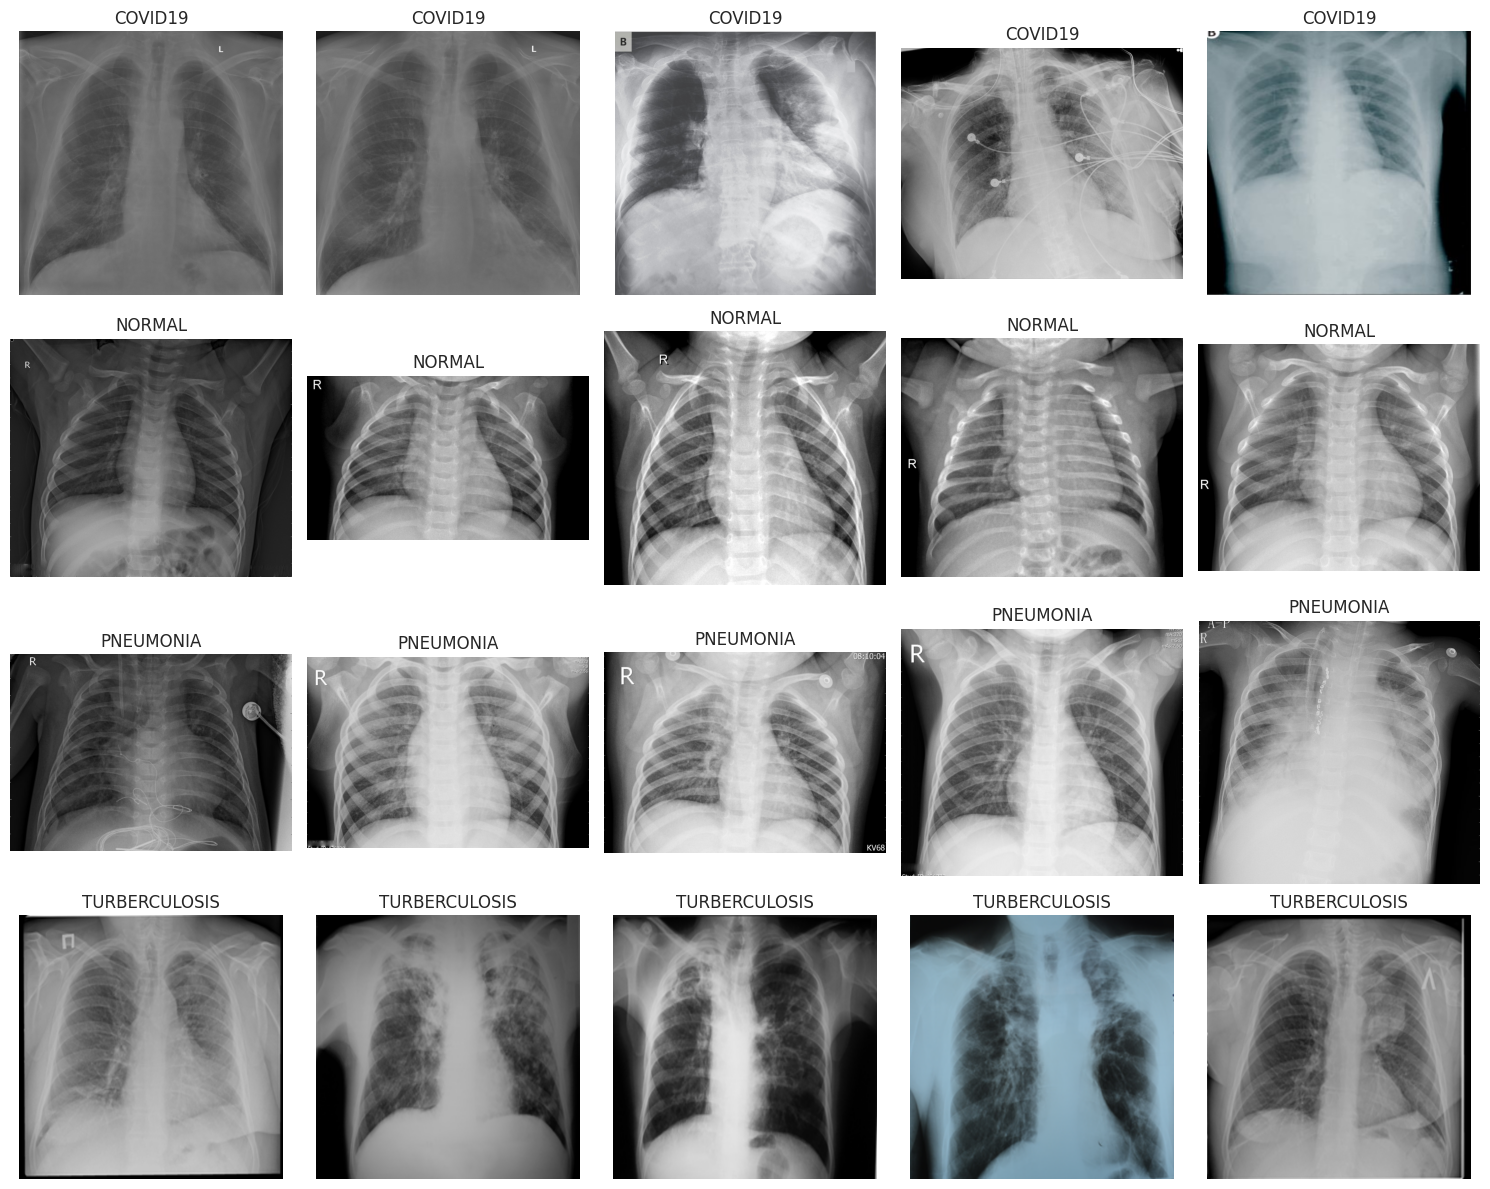

In [19]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [20]:
max_samples = df['label'].value_counts().max()

balanced_df = df.groupby('label', group_keys=False).apply(
    lambda x: x.sample(n=max_samples, replace=True, random_state=42)
).reset_index(drop=True)

balanced_df = balanced_df[['image_path', 'label']]

/tmp/ipython-input-2249685847.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('label', group_keys=False).apply(


In [21]:
df = balanced_df

In [22]:
df

,image_path,label
0,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
1,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
2,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
3,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
4,/kaggle/input/chest-x-ray-dataset-4-categories...,COVID19
...,...,...
17087,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
17088,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
17089,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS
17090,/kaggle/input/chest-x-ray-dataset-4-categories...,TURBERCULOSIS


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split

def compute_confusion_matrix(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    valid_mask = (y_pred >= 0) & (y_pred < num_classes)
    for t, p in zip(y_true[valid_mask], y_pred[valid_mask]):
        cm[int(t), int(p)] += 1
    return cm

def compute_classification_report(y_true, y_pred, num_classes, class_names):
    report = {}
    cm = compute_confusion_matrix(y_true, y_pred, num_classes)
    for i in range(num_classes):
        precision = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
        recall = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
        f1 = (2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0)
        support = np.sum(y_true == i)
        report[class_names[i]] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1,
            'support': support
        }
    return report

class ProxyAnchorLoss(nn.Module):
    def __init__(self, num_classes, embedding_size, margin=0.1, alpha=32):
        super().__init__()
        self.num_classes = num_classes
        self.margin = margin
        self.alpha = alpha
        self.proxies = nn.Parameter(torch.randn(num_classes, embedding_size))
        nn.init.kaiming_normal_(self.proxies, mode='fan_out')

    def forward(self, embeddings, labels):
        embeddings = nn.functional.normalize(embeddings, dim=-1)
        proxies = nn.functional.normalize(self.proxies, dim=-1)
        cos_sim = embeddings @ proxies.t()
        one_hot = nn.functional.one_hot(labels, num_classes=self.num_classes).float()
        pos_mask = one_hot
        neg_mask = 1 - one_hot
        pos_exp = torch.exp(-self.alpha * (cos_sim - self.margin))
        pos_loss = torch.log(1 + torch.sum(pos_exp * pos_mask, dim=1))
        neg_exp = torch.exp(self.alpha * (cos_sim + self.margin))
        neg_loss = torch.log(1 + torch.sum(neg_exp * neg_mask, dim=1))
        loss = (pos_loss + neg_loss).mean()
        return loss

class CustomDataset(Dataset):
    def __init__(self, df_sub, transform=None):
        self.df = df_sub.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['image_path']
        label = class_map[self.df.iloc[idx]['label']]
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img, label

try:
    class_map = {"COVID19": 0, "NORMAL": 1, "PNEUMONIA": 2, "TURBERCULOSIS": 3}
    class_names = list(class_map.keys())
    old_df = df[df['label'] != "TURBERCULOSIS"]
    train_df, test_df_old = train_test_split(old_df, test_size=0.2, stratify=old_df['label'], random_state=42)
    new_df = df[df['label'] == "TURBERCULOSIS"]
    test_df_new = new_df
    few_shot_df = new_df.sample(5, random_state=42)
    test_df_all = pd.concat([test_df_old, test_df_new])
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    train_dataset = CustomDataset(train_df, transform)
    test_dataset_old = CustomDataset(test_df_old, transform)
    test_dataset_new = CustomDataset(test_df_new, transform)
    test_dataset_all = CustomDataset(test_df_all, transform)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0, pin_memory=True)
except NameError:
    print("Warning: 'df' is not defined.")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

backbone = models.resnet18(pretrained=True)
num_ftrs = backbone.fc.in_features
backbone.fc = nn.Linear(num_ftrs, 128)
model = backbone.to(device)

criterion = ProxyAnchorLoss(num_classes=3, embedding_size=128).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 10
losses = []
accuracies = []

model.train()
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0
    total = 0
    for batch_images, batch_labels in train_loader:
        batch_images = batch_images.to(device)
        batch_labels = batch_labels.to(device)
        embeddings = model(batch_images)
        loss = criterion(embeddings, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        sim = embeddings @ nn.functional.normalize(criterion.proxies, dim=-1).t()
        pred = torch.argmax(sim, dim=1)
        correct += (pred == batch_labels).sum().item()
        total += batch_labels.size(0)
    avg_loss = epoch_loss / len(train_loader)
    acc = correct / total if total > 0 else 0
    losses.append(avg_loss)
    accuracies.append(acc)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Acc: {acc:.4f}")

ref_embeddings = {}

model.eval()
with torch.no_grad():
    for c in range(3):
        class_df = train_df[train_df['label'] == class_names[c]]
        class_dataset = CustomDataset(class_df, transform)
        class_loader = DataLoader(class_dataset, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)
        class_emb = []
        for imgs, _ in class_loader:
            class_emb.append(model(imgs.to(device)).cpu().numpy())
        if class_emb:
            centroid = np.mean(np.concatenate(class_emb), axis=0)
            ref_embeddings[c] = centroid

def retrieve_label(embs, ref_embeddings, threshold=0.75):
    preds = []
    for emb in embs:
        emb_norm = emb / (np.linalg.norm(emb) + 1e-8)
        max_sim = -1
        pred_class = -1
        for c, ref in ref_embeddings.items():
            ref_norm = ref / (np.linalg.norm(ref) + 1e-8)
            sim = np.dot(emb_norm, ref_norm)
            if sim > max_sim:
                max_sim = sim
                pred_class = c
        preds.append(pred_class if max_sim > threshold else -1)
    return np.array(preds)

def get_embeddings(dataset):
    loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)
    embs = []
    labels = []
    with torch.no_grad():
        for imgs, lbls in loader:
            embs.append(model(imgs.to(device)).cpu().numpy())
            labels.append(lbls.numpy())
    return np.concatenate(embs), np.concatenate(labels)

test_emb_old, test_lbl_old = get_embeddings(test_dataset_old)
pred_old = retrieve_label(test_emb_old, ref_embeddings)
cm_old = compute_confusion_matrix(test_lbl_old, pred_old, 3)
report_old = compute_classification_report(test_lbl_old, pred_old, 3, class_names[:3])

few_dataset = CustomDataset(few_shot_df, transform)
few_emb, _ = get_embeddings(few_dataset)
centroid_new = np.mean(few_emb, axis=0)
ref_embeddings[3] = centroid_new

test_emb_all, test_lbl_all = get_embeddings(test_dataset_all)
pred_all = retrieve_label(test_emb_all, ref_embeddings)
cm_all = compute_confusion_matrix(test_lbl_all, pred_all, 4)
report_all = compute_classification_report(test_lbl_all, pred_all, 4, class_names)

print("Training Loss Plot Data: epochs = list(range(1,11)), losses =", losses)
print("Training Accuracy Plot Data: epochs = list(range(1,11)), accuracies =", accuracies)
print("\nConfusion Matrix on Old Classes (3x3):\n", cm_old)
print("\nClassification Report on Old Classes:\n", report_old)
print("\nConfusion Matrix on All Classes (4x4):\n", cm_all)
print("\nClassification Report on All Classes:\n", report_all)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 103MB/s]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
